# Dec 11th, 2022 (AD: copy BOLD + correct rename)

**Motivation**: copied data from /Hadi_AD to raw folder, this is the new BOLD confound-regressed (high-pass)  <br>

In [1]:
# HIDE CODE


import os
import sys
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from scipy.ndimage import gaussian_filter
from IPython.display import display, IFrame, HTML

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')
fig_base_dir = pjoin(git_dir, 'jb-Ca-fMRI/figs')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')

# GitHub
sys.path.insert(0, pjoin(git_dir, '_Ca-fMRI'))
from figures.fighelper import *
from analysis.final import *
from utils.render import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from tqdm.notebook import tqdm
%matplotlib inline
set_style()

In [2]:
def _xt(f, space: str = 'common'):
    sub = [e.split('-')[1] for e in f.name.split('_') if 'sub' in e].pop()
    ses = [e.split('-')[1] for e in f.name.split('_') if 'ses' in e].pop()
    run = [e.split('-')[1] for e in f.name.split('_') if 'run' in e].pop()
    task = [e.split('-')[1] for e in f.name.split('_') if 'task' in e].pop()
    name = '_'.join([
        f"sub-{sub}",
        f"ses-{ses}",
        f"run-{run}",
        f"task-{task}",
        f"space-{space}",
        f"desc-{desc}",
    ])
    return sub, ses, run, task, name


def _sort(key):
    if isinstance(key, tuple):
        key = key[0]
    ses, run = key.split('_')
    run = int(re.findall(r'\d+', run).pop())
    ses = int(re.findall(r'\d+', ses).pop())
    return ses * 100 + run


def ses_cond(ses):
    se = list(filter(None, re.split('(\d+)', ses)))
    if len(se) == 1:
        cond = ''
        se = int(se[0])
    elif len(se) == 2:
        cond = str(se[1])
        se = int(se[0])
    else:
        raise RuntimeError
    return se, cond

## Generate new parcel

In [3]:
# mice = Mice(512)
# mice.parcel.fit_parcel()

## Dirs

In [3]:
raw_dir = '/mnt/storage/hadi/Ca-fMRI/raw'
meta_dir = '/home/hadi/Documents/Ca-fMRI/meta_info'
data_dir = '/mnt/storage/hadi/Ca-fMRI/Hadi_AD'

In [4]:
for f in sorted(os.listdir(raw_dir)):
    if 'sub-DKI' in f or 'sub-WT' in f:
        os.remove(pjoin(raw_dir, f))

## Copy files

In [5]:
os.listdir(data_dir)

['AllData_FC_MOT6_WM_nogsr', 'frame_censoring_mask']

### fMRI

In [6]:
%%time

path = pjoin(data_dir, 'AllData_FC_MOT6_WM_nogsr')
files = pathlib.Path(path).rglob('**/*.nii.gz')

space = 'common'
desc = 'fc-mot6-wm'
present = collections.defaultdict(dict)
for f in files:
    if 'run' not in f.name:
        continue
    sub, ses, run, task, name = _xt(f, space)
    name = f"{name}_bold.nii.gz"
    present[sub][f"ses-{ses}_run-{run}"] = name
    
    dst = pjoin(raw_dir, name)
    if not os.path.isfile(dst):
        shutil.copyfile(
            src=str(f),
            dst=dst,
        )
present = {
    k: dict(sorted(v.items(), key=_sort))
    for k, v in present.items()
}
present = dict(sorted(present.items()))

CPU times: user 229 ms, sys: 52.1 s, total: 52.4 s
Wall time: 3min 50s


In [7]:
present

{
    'DKI06': {
        'ses-1_run-14': 'sub-DKI06_ses-1_run-14_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
        'ses-1_run-16': 'sub-DKI06_ses-1_run-16_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
        'ses-1_run-18': 'sub-DKI06_ses-1_run-18_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz'
    },
    'DKI07': {
        'ses-1_run-7': 'sub-DKI07_ses-1_run-7_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
        'ses-1_run-9': 'sub-DKI07_ses-1_run-9_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
        'ses-1_run-11': 'sub-DKI07_ses-1_run-11_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
        'ses-2_run-10': 'sub-DKI07_ses-2_run-10_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
        'ses-2_run-13': 'sub-DKI07_ses-2_run-13_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
        'ses-2_run-15': 'sub-DKI07_ses-2_run-15_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz'
    },
    'DKI08': {
        'ses-1_run-17': 'sub-DKI08_ses-1_run-17_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
        'ses-1_run-19': 'sub-DKI08_ses-1_run-19_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
        'ses-1_run-21': 'sub-DKI08_ses-1_run-21_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz'
    },
    'DKI09': {
        'ses-1_run-8': 'sub-DKI09_ses-1_run-8_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
        'ses-1_run-10': 'sub-DKI09_ses-1_run-10_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
        'ses-1_run-12': 'sub-DKI09_ses-1_run-12_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
        'ses-2_run-8': 'sub-DKI09_ses-2_run-8_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
        'ses-2_run-10': 'sub-DKI09_ses-2_run-10_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
        'ses-2_run-12': 'sub-DKI09_ses-2_run-12_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz'
    },
    'DKI10': {
        'ses-1_run-8': 'sub-DKI10_ses-1_run-8_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
        'ses-1_run-10': 'sub-DKI10_ses-1_run-10_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
        'ses-1_run-12': 'sub-DKI10_ses-1_run-12_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz'
    },
    'DKI11': {
        'ses-1_run-8': 'sub-DKI11_ses-1_run-8_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
        'ses-1_run-10': 'sub-DKI11_ses-1_run-10_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
        'ses-1_run-13': 'sub-DKI11_ses-1_run-13_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
        'ses-2_run-7': 'sub-DKI11_ses-2_run-7_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
        'ses-2_run-9': 'sub-DKI11_ses-2_run-9_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
        'ses-2_run-11': 'sub-DKI11_ses-2_run-11_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz'
    },
    'DKI12': {
        'ses-1_run-11': 'sub-DKI12_ses-1_run-11_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
        'ses-1_run-13': 'sub-DKI12_ses-1_run-13_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
        'ses-1_run-15': 'sub-DKI12_ses-1_run-15_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
        'ses-2_run-10': 'sub-DKI12_ses-2_run-10_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
        'ses-2_run-12': 'sub-DKI12_ses-2_run-12_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
        'ses-2_run-14': 'sub-DKI12_ses-2_run-14_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz'
    },
    'DKI14': {
        'ses-1_run-7': 'sub-DKI14_ses-1_run-7_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
        'ses-1_run-9': 'sub-DKI14_ses-1_run-9_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
        'ses-1_run-11': 'sub-DKI14_ses-1_run-11_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz'
    },
    'DKI15': {
        'ses-1_run-12': 'sub-DKI15_ses-1_run-12_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
        'ses-1_run-14': 'sub-DKI15_ses-1_run-14_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz

### Rename, save meta run info

In [8]:
groups = []
for item in present:
    groups.append(re.findall("[a-zA-Z]+", item).pop())
groups = sorted(set(groups))
anim2sub = {
    g: {
        int(re.findall("[^a-zA-Z]+", k).pop()): sub for sub, k
        in enumerate(filter(lambda x: g in x, present), start=1)
    } for g in groups
}
anim2sub

{
    'DKI': {
        6: 1,
        7: 2,
        8: 3,
        9: 4,
        10: 5,
        11: 6,
        12: 7,
        14: 8,
        15: 9,
        16: 10,
        20: 11,
        21: 12,
        22: 13,
        26: 14,
        27: 15,
        32: 16,
        33: 17,
        34: 18,
        35: 19,
        41: 20,
        42: 21,
        44: 22,
        45: 23,
        46: 24,
        47: 25,
        48: 26,
        49: 27,
        50: 28,
        51: 29,
        53: 30,
        54: 31,
        55: 32,
        62: 33,
        63: 34,
        64: 35,
        65: 36,
        76: 37,
        78: 38,
        79: 39,
        80: 40,
        81: 41,
        90: 42,
        91: 43,
        92: 44
    },
    'WT': {
        2: 1,
        3: 2,
        4: 3,
        5: 4,
        17: 5,
        18: 6,
        19: 7,
        23: 8,
        24: 9,
        25: 10,
        38: 11,
        40: 12,
        52: 13,
        56: 14,
        58: 15,
        59: 16,
        60: 17,
        66: 18,
        67: 19,
        68: 20,
        69: 21,
        70: 22,
        71: 23,
        72: 24,
        74: 25
    }
}

In [9]:
df = []
for k, d in present.items():
    # do sub
    group = re.findall("[a-zA-Z]+", k).pop()
    a = int(re.findall("[^a-zA-Z]+", k).pop())
    su = anim2sub[group][a]

    # do sessions & runs
    sessions = np.unique([
        ses_cond(e.split('_')[0].split('-')[-1])[0]
        for e in d
    ])
    sessions = {
        se: len([x for x in d if f'ses-{se}' in x])
        for se in sessions
    }
    ru_new = 1
    
    for k, f in d.items():
        se, ru = k.split('_')
        ru = int(ru.split('-')[-1])
        se = se.split('-')[-1]
        se, cond = ses_cond(se)
        df.append({
            'group': [group],
            'anim': [a],
            'sub': [su],
            'ses': [se],
            'run': [ru],
            'cond': [cond],
            'run_new': [ru_new],
        })
        key_new = f"sub-{group}{su:02d}_ses-{se}_run-{ru_new}"
        f_new = f"{key_new}_{'_'.join(f.split('_')[3:])}"
        os.rename(
            src=pjoin(raw_dir, f),
            dst=pjoin(raw_dir, f_new),
        )
        ru_new += 1
        if ru_new > sessions[se]:
            ru_new -= sessions[se]

df = pd.DataFrame(merge_dicts(df))
df.to_csv(pjoin(meta_dir, 'ad_runs.csv'), sep='\t')

In [10]:
df

,group,anim,sub,ses,run,cond,run_new
0,DKI,6,1,1,14,,1
1,DKI,6,1,1,16,,2
2,DKI,6,1,1,18,,3
3,DKI,7,2,1,7,,1
4,DKI,7,2,1,9,,2
...,...,...,...,...,...,...,...
343,WT,72,24,5,7,nontreated,2
344,WT,72,24,5,8,nontreated,3
345,WT,74,25,5,5,nontreated,1
346,WT,74,25,5,6,nontreated,2


### frame censoring

In [11]:
path = pjoin(data_dir, 'frame_censoring_mask')
files = pathlib.Path(path).rglob('**/*.csv')

df = []
for f in files:
    if 'run' not in f.name:
        continue
    anim, ses, run, task, _ = _xt(f)
    if f"ses-{ses}_run-{run}" not in present[anim]:
        print(f"Warning, missing:\n{f.name}")

    vals = pd.read_csv(str(f)).values.ravel()
    ses, cond = ses_cond(ses)
    key = f"sub-{anim}_ses-{ses}_run-{run}"
    df.append({
        'anim': [anim] * len(vals),
        'ses': [ses] * len(vals),
        'run': [int(run)] * len(vals),
        'key': [key] * len(vals),
        'cond': [cond] * len(vals),
        'temporal_mask': vals.astype(int),
    })

df = pd.DataFrame(merge_dicts(df))
df = df.sort_values(['anim', 'ses', 'run'])
_ = save_obj(
    obj=df,
    file_name='ad_tmask',
    save_dir=meta_dir,
    mode='df',
)

[PROGRESS] 'ad_tmask.df' saved at
/home/hadi/Documents/Ca-fMRI/meta_info

In [12]:
df['cond'].unique()

array(['', 'awakecontrol', 'nontreated', 'treated'], dtype=object)

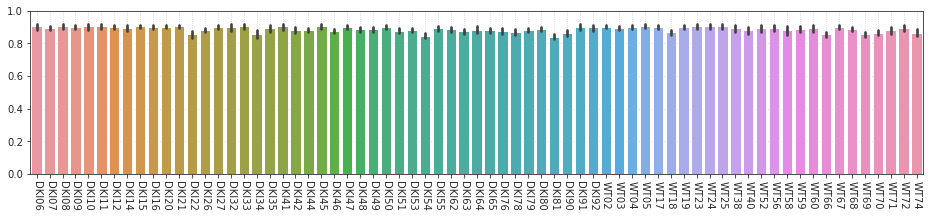

In [13]:
fig, ax = create_figure(figsize=(16, 3))
sns.barplot(
    data=df,
    x='anim',
    y='temporal_mask',
    order=sorted(df['anim'].unique()),
    ax=ax,
)
ax.set(xlabel='', ylabel='', ylim=(0, 1))
ax.tick_params('x', rotation=-90)
ax.grid()
plt.show()

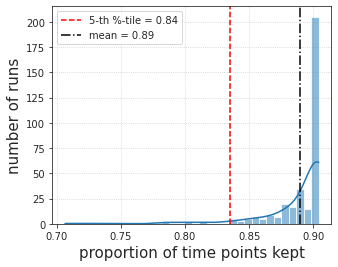

In [14]:
_df = df.groupby(['key']).mean()

fig, ax = create_figure(1, 1, (5, 4))

sns.histplot(_df, x='temporal_mask', kde=True, ax=ax)
q = _df['temporal_mask'].quantile(q=0.05)
ax.axvline(q, color='r', ls='--', label=f'5-th %-tile = {q:0.2f}')
q = _df['temporal_mask'].mean()
ax.axvline(q, color='k', ls='-.', label=f'mean = {q:0.2f}')
ax.set_xlabel('proportion of time points kept', fontsize=15)
ax.set_ylabel('number of runs', fontsize=15)
ax.locator_params(axis='x', nbins=5)
ax.legend()
ax.grid()

plt.show()

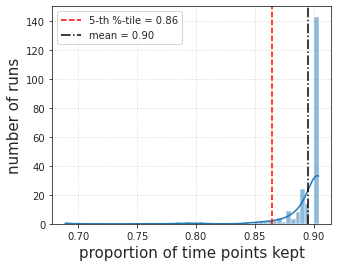

## Anat (exact match N162?)

In [14]:
from register.register import Register, reset_ants_img

mice = Mice(512)
reg = Register(mice)

In [15]:
reg.in_house

ANTsImage (RAI)
         Pixel Type : float (float32)
         Components : 1
         Dimensions : (81, 46, 60)
         Spacing    : (200.0, 200.0, 200.0)
         Origin     : (-7.8, -6.2, 6.4)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

In [16]:
x = 'sub-DKI26_ses-1_run-3_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz'
x = ants.image_read(pjoin(mice.cfg.raw_dir, x))
x

ANTsImage
         Pixel Type : float (float32)
         Components : 1
         Dimensions : (60, 46, 81, 302)
         Spacing    : (0.2, 0.2, 0.2, 1.0)
         Origin     : (18.2, 2.8, -7.8, 0.0)
         Direction  : [-1.  0.  0.  0.  0. -1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.]

In [17]:
n162 = pjoin(
    '/home/hadi/Documents/Ca-fMRI/Yale/atlases_templates',
    'Symmetric_N162_0.20.nii.gz',
)
n162 = ants.image_read(n162)
n162

ANTsImage (RAI)
         Pixel Type : float (float32)
         Components : 1
         Dimensions : (60, 46, 81)
         Spacing    : (0.2, 0.2, 0.2)
         Origin     : (6.4, -6.2, -7.8)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

In [2]:
ras = pjoin(
    '/home/hadi/Documents/Ca-fMRI/Yale/atlases_templates',
    'Symmetric_N162_0.20_RAS.nii.gz',
)
ras = ants.image_read(ras)
ras

ANTsImage (LPI)
         Pixel Type : float (float32)
         Components : 1
         Dimensions : (60, 81, 46)
         Spacing    : (0.2, 0.2, 0.2)
         Origin     : (18.2, 2.8, -7.8)
         Direction  : [-1.  0.  0.  0. -1.  0.  0.  0.  1.]

### Plot N162 with mask

In [47]:
m = np.abs(x.numpy()).sum(-1) > 0
m = m[::-1][:, ::-1]
m.shape

(60, 46, 81)

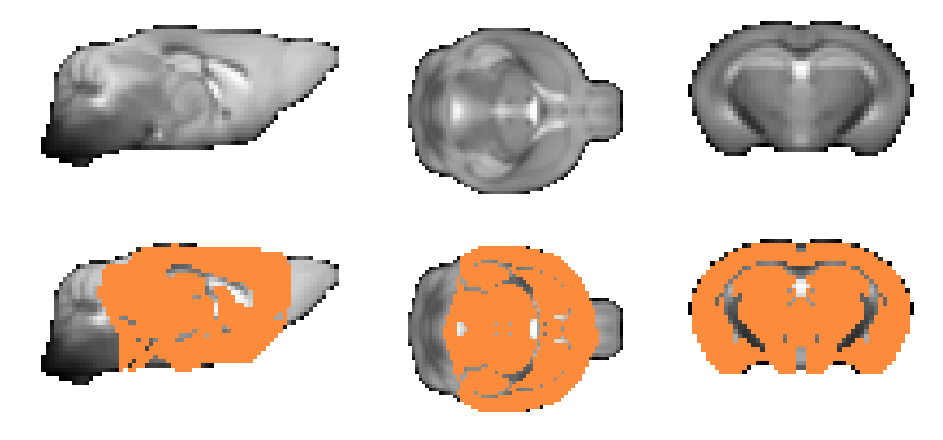

In [116]:
fig, axes = create_figure(2, 3, (13, 6), width_ratios=[1.2, 1, 0.95], constrained_layout=True)

thres = 3000

for i in range(2):
    axes[i, 0].imshow(mwh(n162[33] <= thres, n162[33]), cmap='Greys_r')
    axes[i, 1].imshow(mwh(n162[:, 16, :] <= thres, n162[:, 16, :]), cmap='Greys_r')
    axes[i, 2].imshow(mwh(n162[:, :, 40] <= thres, n162[:, :, 40]).T, cmap='Greys_r')

axes[1, 0].imshow(mwh(m[33] == 0, m[33]), cmap='Oranges', vmin=0, vmax=2)
axes[1, 1].imshow(mwh(m[:, 16, :] == 0, m[:, 16, :]), cmap='Oranges', vmin=0, vmax=2)
axes[1, 2].imshow(mwh(m[:, :, 40] == 0, m[:, :, 40]).T, cmap='Oranges', vmin=0, vmax=2)

remove_ticks(axes)
plt.show()

### Results: almost matches

The dimensionalities match between N162 and rabies fMRI outputs, but the first 2 directions are inverted:
- Directions in x ([-1.  0.  0.  0. -1.  0.  0.  0.  1.])
- Direction in N162: [1. 0. 0. 0. 1. 0. 0. 0. 1.]

**Fix**: when you go from N162 to functional space, simply invert the first two directions and it should be fine.  For example, in the figure above I defined a mask m from x and inverted the first two directions (see code above).  Now they match exactly.

## N162 thres = 3000, good?

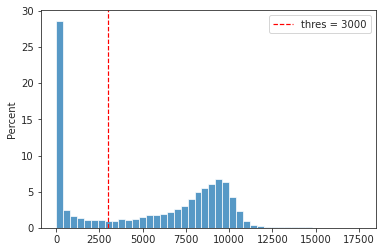

In [138]:
y = n162.numpy()
ax = sns.histplot(y[y.nonzero()], stat='percent', color='C0')
ax.axvline(thres, color='r', ls='--', lw=1.2, label=f'thres = {thres}')
ax.legend()
plt.show()

In [139]:
y[y <= thres] = np.nan
y[y > thres] = 1
y.shape

(60, 46, 81)

### dim = 0

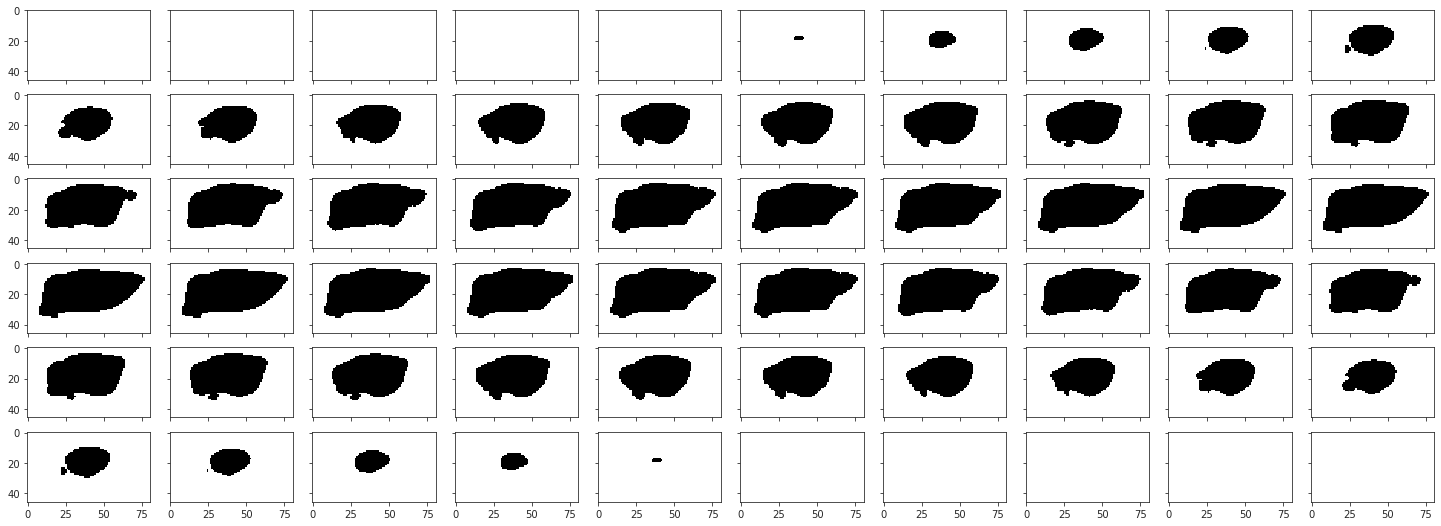

In [140]:
ncols = 10
nrows = int(np.ceil(y.shape[0] / ncols))

fig, axes = create_figure(nrows, ncols, (2 * ncols, 1.2 * nrows), 'all', 'all', constrained_layout=True)
for i, ax in enumerate(axes.flat):
    try:
        ax.imshow(y[i], cmap='Greys_r')
    except IndexError:
        continue
trim_axs(axes, y.shape[0])
plt.show()

### dim = 1

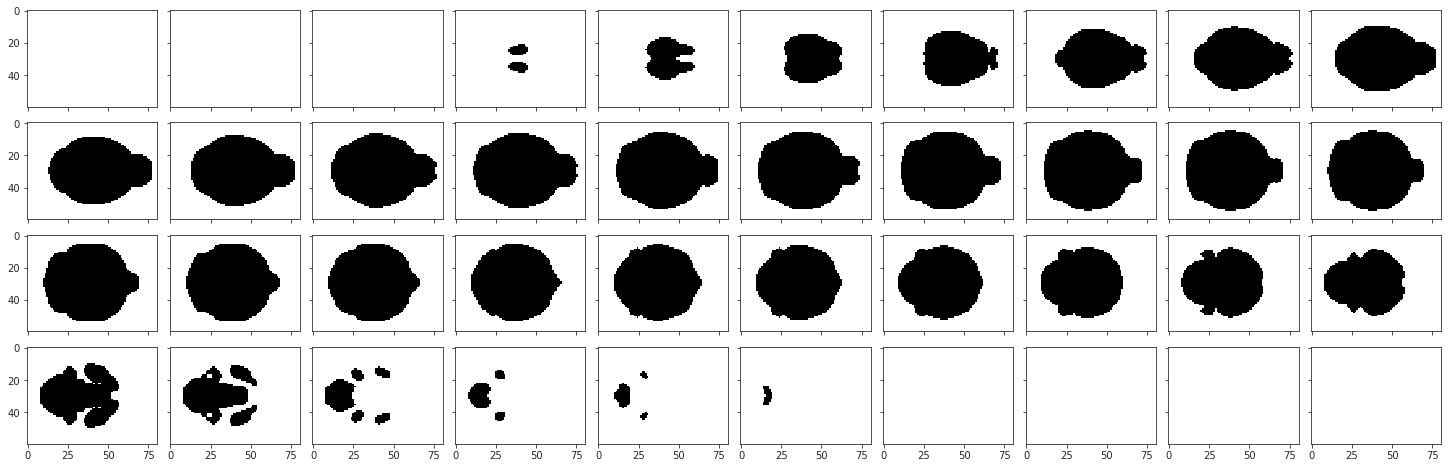

In [141]:
ncols = 10
nrows = int(np.ceil(y.shape[1] / ncols)) - 1

fig, axes = create_figure(nrows, ncols, (2 * ncols, 1.6 * nrows), 'all', 'all', constrained_layout=True)
for i, ax in enumerate(axes.flat):
    try:
        ax.imshow(y[:, i, :], cmap='Greys_r')
    except IndexError:
        continue
trim_axs(axes, ncols * nrows)
plt.show()

### dim = 2

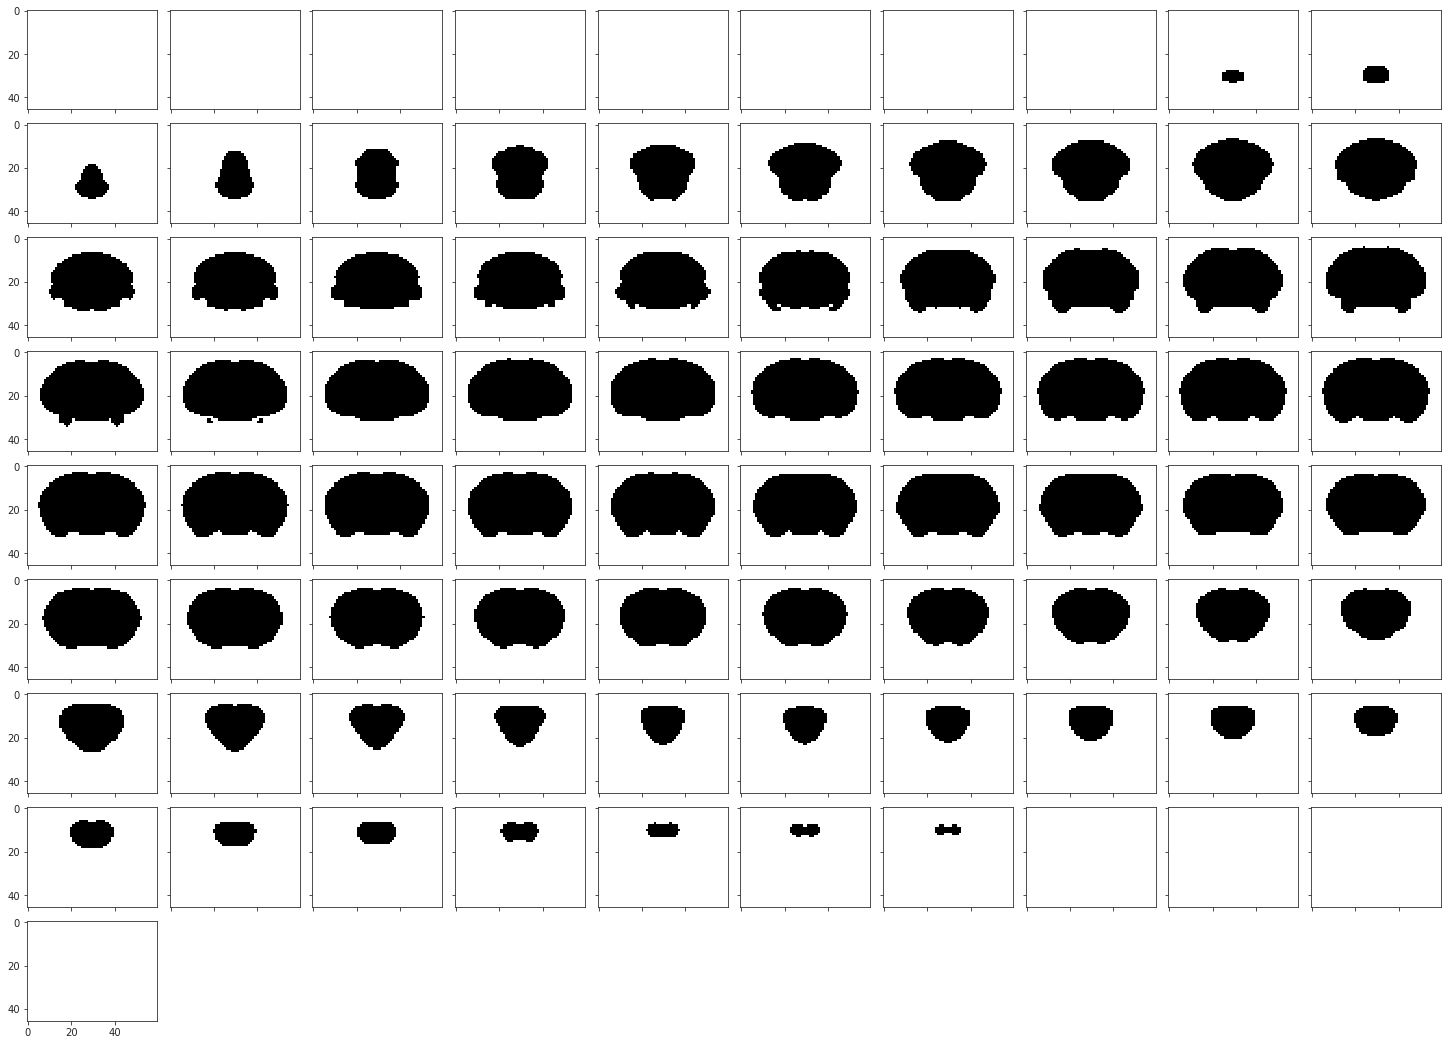

In [142]:
ncols = 10
nrows = int(np.ceil(y.shape[2] / ncols))

fig, axes = create_figure(nrows, ncols, (2 * ncols, 1.6 * nrows), 'all', 'all', constrained_layout=True)
for i, ax in enumerate(axes.flat):
    try:
        ax.imshow(y[..., i].T, cmap='Greys_r')
    except IndexError:
        continue
trim_axs(axes, y.shape[2])
plt.show()